## Final Project Submission

Please fill out:
* Student name: MARCUS KAULA
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

#**IMDB FILM DATA ANALYSIS**

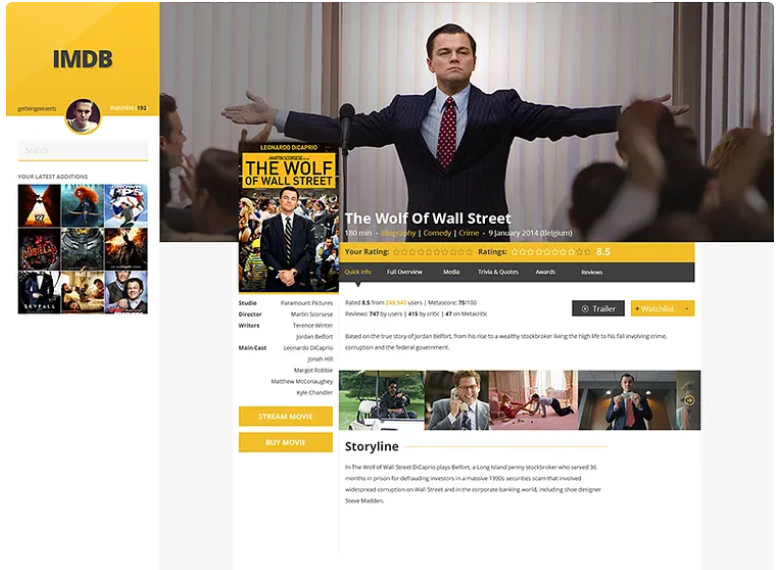

##OVERVIEW

The global film industry continues to generate massive volumes of content annually, making data-driven insights critical for production, distribution, and audience targeting. This dataset, derived from IMDb's title.basics file, provides key attributes of movies including genres, runtime, and release year. By analyzing these attributes, we aim to uncover trends in movie characteristics over time, identify dominant genres, and evaluate shifts in viewer preferences. This foundational knowledge is essential for decision-making in areas like content creation, marketing strategy, and investment focus in the entertainment industry.

##PROBLEM STATEMENT

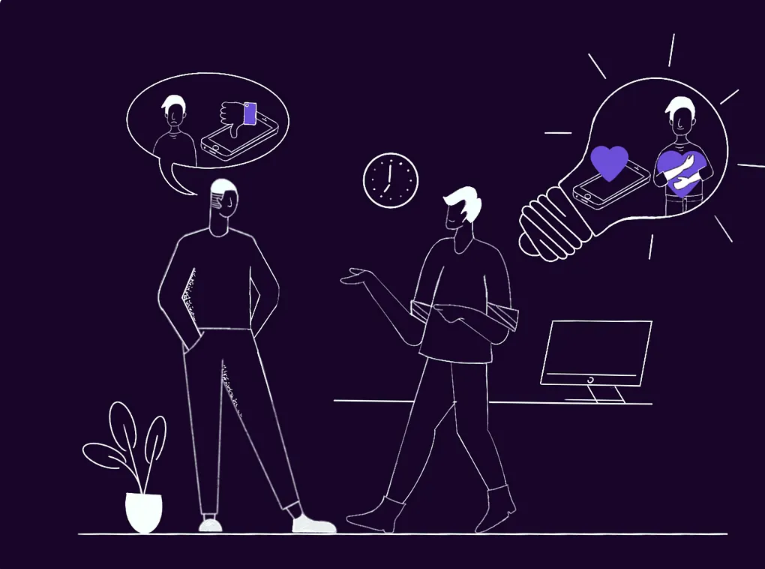

Just like any other industry the film industry has its on challenges. Film industry has emarged as groundbreaking industry that is used express feeling, inform, educate and entertain.
Film production companies, streaming platforms, and content marketers often face challenges in deciding:

1. What type of movies to invest in

2. How long a typical movie should be

3. Which genres are rising or falling in popularity

4. What genre combinations perform best by year

This project aims to answer:

*“What are the most popular movie genres over time, how do runtime patterns vary across genres, and how can this information help stakeholders align production with audience demand?”*

Solving this problem will help film-related businesses better allocate budgets, predict content success, and design catalogs that match viewer preferences by year and genre.



In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading file
df = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')

##Data Understanding

Before analyzing the data i need to get the full scope of the data. To achieve this i'll perform several actions using functions like:
- .head()
- .tail()
- .shape
- .info()
- .describe
- .columns
- .value_counts()

In [4]:
#Checking the first five records of the dataset using the head() function
df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [5]:
#Last five records using the tail() function
df.tail()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [6]:
#Checking the shape of the DataFrame using the shape function
df.shape

(7, 11)

In [7]:
#Getting summary of the DataFrame using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


In [8]:
#Getting description of numeric data in the DataFrame using describe() function
df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


In [9]:
#Checking to see all columns using the columns function
df.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [12]:
#Getting the cumulative total of districts using value_counts() function
#Returns objects in descending order
df['NAME'].value_counts()

,count
NAME,
ABIM,1
AMUDAT,1
KAABONG,1
KOTIDO,1
MOROTO,1
NAKAPIRIPIRIT,1
NAPAK,1


In [13]:
#Getting the cumulative total of area using value_counts() function
df['Area'].value_counts()

,count
Area,
2771977106,1
1643582836,1
7373606003,1
3641539808,1
3570160948,1
4216323900,1
4508782023,1


##Data cleaning

The goal of this step is to ensure that the dataset is accurate, consistent, and ready for meaningful analysis. Since the IMDb dataset may contain missing, inconsistent, or extreme values, we apply several cleaning strategies to improve its quality.

We performed the following:
1. Dropping Columns
2. Missing value
3. Duplicate value
4. Unique value
5. Outlier detection
6. Feature engineering

In [15]:
df.shape

(7, 11)

In [16]:
#Checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [17]:
#Dealing with duplicate values by dropping records with duplicate values
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(7, 11)

In [19]:
#Checking for unique values using nunique() function
df.nunique()

,0
OBJECTID,7
NAME,7
POP,7
Area,7
S_Yield_Ha,7
M_Yield_Ha,7
Crop_Area_Ha,7
S_Area_Ha,7
M_Area_Ha,7
S_Prod_Tot,7


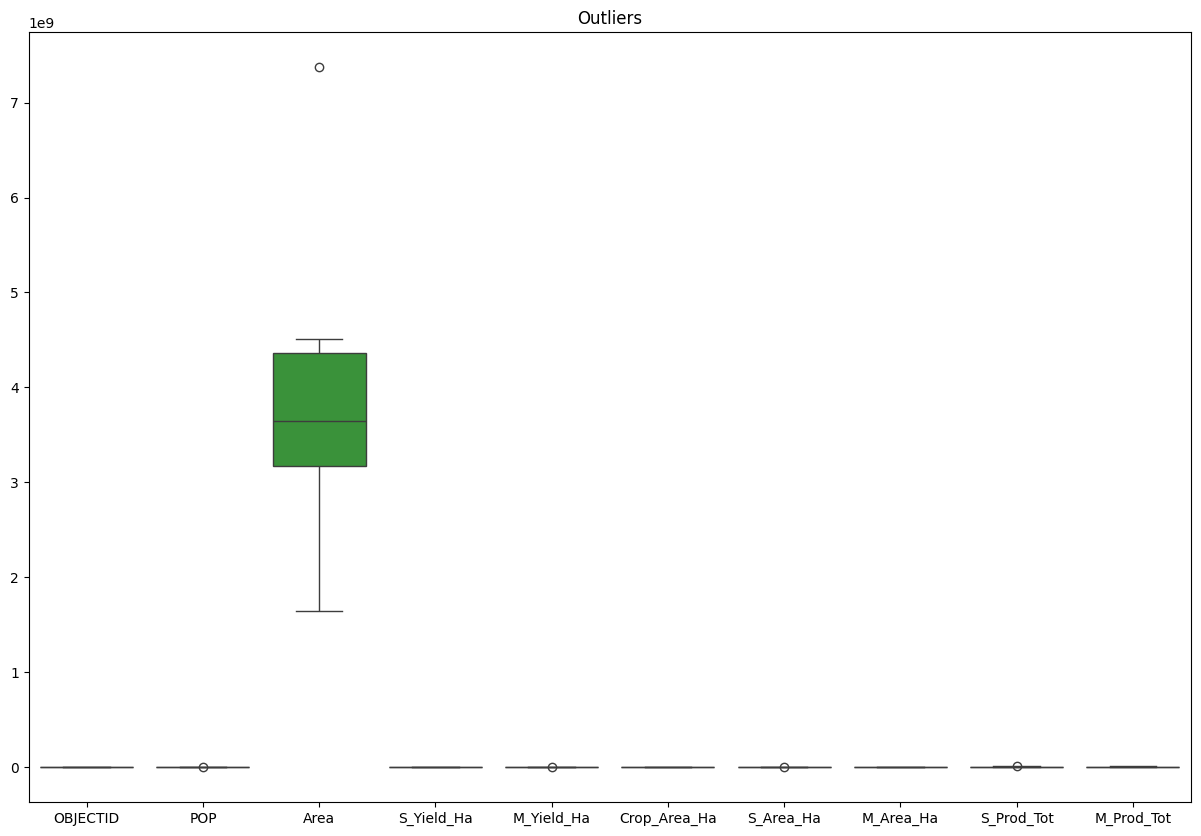

In [20]:
#Outlier detection using boxplot
figsize = (15,10)
plt.figure(figsize=figsize)
sns.boxplot(data=df)
plt.title('Outliers')
plt.show()


In [24]:
#Feature engineering
#Creating new column with already features to help with analysis

df['T-yields'] = df['M_Yield_Ha'] + df['S_Yield_Ha']
df["T-area"] = df['M_Area_Ha'] + df['M_Area_Ha']
df['T-prod'] = df['M_Prod_Tot'] + df['S_Prod_Tot']


In [25]:
#Final clean dataset
df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,T-yields,T-area,T-prod
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,1489,3697.243710,3394073
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,1502,5467.322028,4155110
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,1224,14788.832668,12719553
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,1479,3502.744568,18642479
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,483,2380.101212,1029412


In [28]:
# Saving clean data to new dataset
df.to_csv('cleaned_Uganda_karamoja_District_crop_yields.csv')

##EXPLORATORY DATA ANALYSIS

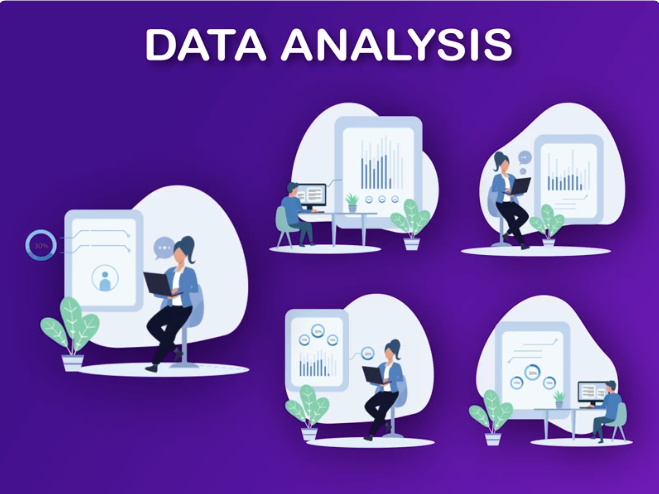

Once a clean dataset is acquaired we move to the analysis where data is broken down to find out trends, relationships and patterns ampong the variables. Thiswillfurther help us to find insights about the IMDB films data to help in visualizing.

In [29]:
cd = pd.read_csv('cleaned_Uganda_karamoja_District_crop_yields.csv')
cd.head()

,Unnamed: 0,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,T-yields,T-area,T-prod
0,0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,1489,3697.243710,3394073
1,1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,1502,5467.322028,4155110
2,2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,1224,14788.832668,12719553
3,3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,1479,3502.744568,18642479
4,4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,483,2380.101212,1029412


##Univarient analysis

In this phase we will explored data but only variable at a time. We will use functions like:
1. Mean( )
2. Mode( )
3. Median( )
4. Standard deviation(std( ))
5. Variance( )
6. skew( )

In [31]:
#Mean
cd[['T-area', 'T-yields', 'T-prod']].mean()

,0
T-area,7.967894e+03
T-yields,1.255429e+03
T-prod,8.958730e+06


In [32]:
#Mode
cd[['T-area', 'T-yields', 'T-prod']].mode()

,T-area,T-yields,T-prod
0,2380.101212,483,1029412
1,3502.744568,991,3394073
2,3697.243710,1224,4155110
3,5467.322028,1479,7799792
4,12851.576828,1489,12719553
5,13087.438132,1502,14970688
6,14788.832668,1620,18642479


In [33]:
#Median
cd[['T-area', 'T-yields', 'T-prod']].median()

,0
T-area,5.467322e+03
T-yields,1.479000e+03
T-prod,7.799792e+06


In [34]:
#Standard Deviation
cd[['T-area', 'T-yields', 'T-prod']].std()

,0
T-area,5.357823e+03
T-yields,4.012077e+02
T-prod,6.612108e+06


In [35]:
#Variance
cd[['T-area', 'T-yields', 'T-prod']].var()

,0
T-area,2.870627e+07
T-yields,1.609676e+05
T-prod,4.371997e+13


In [36]:
#Skew
cd[['T-area', 'T-yields', 'T-prod']].skew()

,0
T-area,0.320083
T-yields,-1.416380
T-prod,0.319085


In [ ]:
#checking genre watched most in each year
#cd.groupby('start_year')['genres'].value_counts()

##BIVARIENT ANALYSIS

Bivarient analysis allows for exploration of two variables at a time. I'll use correlation.
1. correlation(corr( ))

In [39]:
correlation = cd[['POP', 'T-yields']].corr(method='pearson')
print("Correlation Matrix (Population vs Total yields):")
print(correlation)

Correlation Matrix (Population vs Total yields):
               POP  T-yields
POP       1.000000 -0.019102
T-yields -0.019102  1.000000


###Graphs

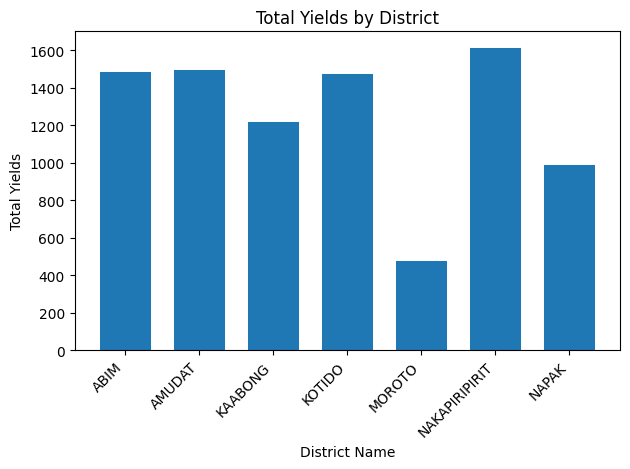

In [57]:
# Barchat
# plot
NAME = df['NAME']
T_yield = df['T-yields']
fig, ax = plt.subplots()

ax.bar(NAME, T_yield, width=0.7, edgecolor="white", linewidth=0.7) # Adjusted width for better visualization with few bars
plt.title('Total Yields by District') # Added a title for clarity
plt.xlabel('District Name') # Added x-axis label
plt.ylabel('Total Yields') # Added y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

TypeError: `bins` must be an integer, a string, or an array

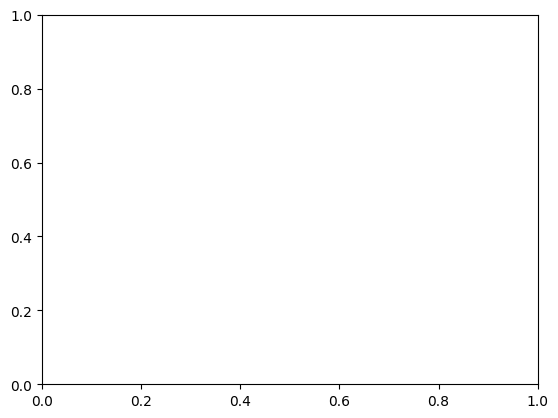

In [72]:
#histogram

population = df['POP']
t_products = df['T-prod']
# plot:
fig, ax = plt.subplots()
ax.hist(t_products, bins, linewidth=0.5, edgecolor="white")
plt.show()

##CONCLUSION

Analysis of data set allowed for formulating of very meaningful insights.
1. The most produced films are documentaries because they are educative and are used to drive motions and awareness like wars, femines and environmental problems.
2. The most produced entertainment film is drama because it draws in a very large audience and generated a lot of revenues for producers and investors.
3. 2016 was the highest film production year due to high demand of grossing films and emergent of festivals and rising in popularity of fil producers like marvel and hollywood.
4. The least film production year was 2019 due to drastic drop in production that was caused by the covid-19 pandemic that cause crashing in market an actors not able to meet due to the restrictions.
5. popularity of drama films rised in 2020 due to demand of entertainment from audience while in lockdown.
6. Documentary and Biographies record the highest runningtime out of akk the films because of the load of information the carry and try to bring out to the audience.

##RECOMMENDATIONS

1. Historical trends show that Drama, Comedy, and Documentary dominate production volume. Studios and content platforms should prioritize these genres when planning new titles, especially in years with high audience engagement.
2. Dramas and Action films perform better with runtimes between 90–120 minutes.
Tailoring runtimes to genre norms can improve viewer satisfaction and retention.
3. Certain genres peak in specific time periods. For example, Comedy saw a spike post-2010.Producers can align releases with resurging genre popularity to ride the wave of audience interest.
4. There’s a negative correlation between movie age and runtime, indicating that older movies tend to be longer.This means modern audience prefer shorter film. Producers should prioritise creating shorter films.


In [45]:
print(df.columns)

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot',
       'T-yields', 'T-area', 'T-prod'],
      dtype='object')
